In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd 
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from PIL import Image 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import glob
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jsonfile/kaggle.json
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3607).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3961).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3958).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3643).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(4088).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3679).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3506).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(4161).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(4121).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3534).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3596).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test

In [2]:
import cv2

# Load the image
image = cv2.imread("/kaggle/input/chest-xray-covid19-pneumonia/Data/train/COVID19/COVID19(451).jpg")


# Get the dimensions
height, width, channels = image.shape

print(f"Image Dimensions: Height={height}, Width={width}, Channels={channels}")


Image Dimensions: Height=1926, Width=1799, Channels=3


In [3]:
''' dataset path '''
dataset_path = '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19'

In [4]:
''' train and test path '''
train_path = '/kaggle/input/chest-xray-covid19-pneumonia/Data/train'
test_path = '/kaggle/input/chest-xray-covid19-pneumonia/Data/test'

Data augmentation and data generators are essential techniques in machine learning and deep learning, particularly for image classification tasks. Let's explore their uses:

Data Augmentation:

Data augmentation is a technique used to artificially increase the diversity and size of your training dataset by applying various transformations to the original data. This is particularly important in image classification tasks because it helps the model become more robust and better at generalizing from a limited dataset.

Common data augmentation techniques for image data include:

Rotation: Rotating the image by a certain degree.
Flip: Flipping the image horizontally or vertically.
Zoom: Applying zooming in or out.
Shear: Applying shearing transformations.
Translation: Shifting the image horizontally or vertically.
Brightness and Contrast Adjustments: Changing the brightness and contrast of the image.
The goal of data augmentation is to introduce variability and randomness into the training data so that the model learns to recognize objects regardless of their orientation, position, lighting conditions, or other factors.

Data Generators:

Data generators are used to load and preprocess data on-the-fly, in mini-batches, during training. They help with memory efficiency, as you don't need to load the entire dataset into memory at once. Data generators can be particularly useful when working with large datasets or limited system memory.

In the context of image classification, data generators serve several purposes:

Load Data: They load images and their corresponding labels from a specified directory or dataset.
Preprocess Data: Data generators can apply preprocessing steps, such as rescaling pixel values or converting images to a common color format.
Data Augmentation: When generating batches for training, data generators can apply data augmentation techniques to the images in each batch, creating variations of the training data.
Batches: Data generators divide the dataset into batches, which are used for training and updating the model's weights. This is crucial for stochastic gradient descent, where the model learns from a subset of the data in each iteration.
In summary, data augmentation and data generators are used in combination to improve the performance of machine learning and deep learning models for image classification by increasing the diversity of training data, improving model generalization, and handling large datasets efficiently. Data augmentation introduces randomness and variation, while data generators help with on-the-fly loading, preprocessing, and batching of data during training. These techniques are widely used in computer vision tasks to build more robust and accurate models.

In [5]:
''' ImageDataGenerator '''

''' data augmentation ''' # Data Augmentation part simply we are generating the required data
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #means that the pixel values of the images will be divided by 255,

train_ds = train_datagen.flow_from_directory(train_path, target_size = (200,200), batch_size = 20, class_mode = 'categorical',
                                         color_mode = 'grayscale')

test_ds = test_datagen.flow_from_directory(test_path, target_size = (200,200), batch_size = 20, class_mode = 'categorical',
                                           color_mode = 'grayscale')

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


train datagen defines data augmentation parameters for the training data pre processing

Test datagen defines preprocessing for the testing data

rescale: Scaling the pixel values of the images to the range [0, 1] by dividing by 255 (common practice for images).
shear_range: Applying shear transformations to the images.
zoom_range: Applying zoom transformations to the images.
horizontal_flip: Applying horizontal flips to the images.

In the context of machine learning and deep learning, it's important to ensure that both your training data and testing data are processed consistently to make fair and meaningful evaluations of your model's performance. Preprocessing is a critical step in this regard.

The statement, "Preprocessing ensures that the testing data is processed in the same way as the training data, except for data augmentation," can be broken down as follows:

====================================================================================

Tranformation like :

Rescaling: It's common to rescale the pixel values of the testing data to a specific range, such as [0, 1] or [-1, 1], depending on how the training data was preprocessed. This ensures that the pixel values are in the same range as the training data.

Color Format Conversion: If your model expects a specific color format (e.g., grayscale or RGB), you may convert the color format of the testing data to match the training data.

Resizing: If the training data was resized to a specific dimension (e.g., 200x200 pixels), you should resize the testing data to the same dimension. This ensures that the input size is consistent.

Normalization: You may apply statistical normalization if the training data was normalized in some way, although this is less common than rescaling.

Can be applied on Testing data and can should apply on training data as well

In summary, the idea is to preprocess both training and testing data consistently with the same preprocessing steps, except for data augmentation. Data augmentation, which involves random transformations like rotations, flips, and zooms, is used exclusively during training to provide the model with a more diverse training set. Preprocessing steps ensure that the input data for both training and testing is compatible and ready for use with the model.

==========================================================================================

Here, data generators (train_ds and test_ds) are created for the training and testing data. These data generators use the defined data augmentation (for training) and preprocessing (for testing).

flow_from_directory: This method loads the images from the specified directory and prepares them for training or testing. It expects the following parameters:

train_path and test_path: The paths to the training and testing data directories.

target_size: The size to which the images are resized.

batch_size: The number of images to process in each batch.

class_mode: In this case, it's set to 'binary' because you're likely working on a binary classification task.

color_mode: It's set to 'grayscale,' which means the images are converted to grayscale.

These data generators will yield batches of images and their corresponding labels for training and testing your machine learning or deep learning model. The data augmentation will be applied to the training data, while the testing data will be preprocessed.

=========================================================================================

other than Sequenctial model we have 

EfficientNet: EfficientNet models are known for their efficient use of resources while delivering strong performance. They are frequently used for a wide range of computer vision tasks. EfficientNet B0, B1, and B2 are often popular choices for practical applications due to their balance between accuracy and computational requirements.

ResNet: Residual Networks (ResNets) remain a popular choice due to their strong performance. ResNet-50 is a widely used variant for various image classification tasks. ResNets with deeper architectures, such as ResNet-101 and ResNet-152, are utilized for more complex tasks.

InceptionV3: InceptionV3 is recognized for its ability to capture complex image features and is widely used in research and industry. It has applications in image classification, object detection, and image segmentation.

MobileNet: MobileNet models are used in mobile and embedded applications due to their low computational cost. MobileNetV2 is a good choice when you need a balance between accuracy and model size.

DenseNet: DenseNet models have been popular in medical imaging applications and are used when strong feature reuse and accuracy are required. DenseNet-121 and DenseNet-169 are commonly used variants.

Xception: Xception, inspired by the Inception architecture, uses depthwise separable convolutions and is known for its strong performance.

Vision Transformers (ViTs): While not included in the previous list, Vision Transformers (ViTs) have gained attention in the research community. These models, such as the original ViT and its variants like DeiT (Data-efficient Image Transformer), have shown impressive results on various image classification tasks.

===================================================================================

VGG (Visual Geometry Group):

VGG16: A 16-layer model with 13 convolutional layers and 3 fully connected layers.
VGG19: Similar to VGG16 but with 19 layers.
ResNet (Residual Network):

ResNet50: A deep network with 50 layers. It introduced the concept of residual connections to address the vanishing gradient problem.
Inception / GoogLeNet:

InceptionV3: A model with multiple "Inception" modules, which use various kernel sizes and concatenate feature maps.
InceptionResNetV2: An extension of Inception with residual connections.
MobileNet:

MobileNetV2: Designed for mobile and embedded vision applications, it offers a good trade-off between accuracy and model size.
Xception:

Xception: Inspired by the Inception architecture, it uses depthwise separable convolutions for improved performance.
DenseNet (Densely Connected Convolutional Networks):

DenseNet121, DenseNet169, DenseNet201: These models connect each layer to every other layer in a feed-forward fashion, promoting feature reuse.
SqueezeNet:

SqueezeNet: A model that uses 1x1 convolutions to reduce the number of parameters while maintaining performance.
NASNet (Neural Architecture Search Network):

NASNetMobile, NASNetLarge: These models were generated using neural architecture search techniques.
EfficientNet:

EfficientNetB0, EfficientNetB1, ...: A family of models designed for efficient resource usage and good accuracy trade-offs.

=========================================================================================

The choice between using dense layers, convolutional layers, and recurrent layers in a neural network architecture depends on the nature of your data, the problem you are trying to solve, and the underlying patterns in the data. Here's a general guideline for when to use each type of layer:

Dense (Fully Connected) Layers:

Data Type: Dense layers are suitable for tabular data, structured data, and data where each feature does not have a spatial relationship with other features. They are also used in the initial layers of some image and text processing models.

Use Cases: Dense layers are often used in:

Feedforward neural networks for tabular data, financial data, and structured data.

The initial layers of convolutional neural networks (CNNs) or recurrent neural networks (RNNs) for tasks like image classification or natural language processing (NLP) to transform the data before applying convolutional or recurrent layers.

Typical Activation Function: ReLU (Rectified Linear Unit) is commonly used in dense layers.


Convolutional Layers:

Data Type: Convolutional layers are suitable for data with a grid-like structure, such as images, where spatial relationships between neighboring pixels or regions are important. They are also used in some natural language processing tasks.

Use Cases: Convolutional layers are often used in:
Convolutional neural networks (CNNs) for image classification, object detection, image segmentation, and other computer vision tasks.

Some text and sequence analysis tasks when using 1D convolutional layers for feature extraction from sequences.

Typical Activation Function: ReLU is commonly used in convolutional layers.



Recurrent Layers:

Data Type: Recurrent layers are suitable for sequential data where the order and temporal dependencies between data points matter. This includes time series data, audio data, natural language sequences, and more.

Use Cases: Recurrent layers are often used in:
Recurrent neural networks (RNNs) for tasks like time series prediction, speech recognition, language modeling, and machine translation.

Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) layers are variations of recurrent layers used to capture long-term dependencies in sequences.

Typical Activation Function: Tanh or sigmoid activations are commonly used in recurrent layers.
In practice, you might use a combination of these layer types within the same model. For example, in a convolutional neural network (CNN) for image classification, you typically use convolutional layers for feature extraction and then flatten the output to apply one or more dense layers for classification. In natural language processing, you might use recurrent layers (e.g., LSTM or GRU) to process sequential data and then apply dense layers for classification or prediction.

The choice of layer type also depends on the problem's complexity and the specific requirements of your task. Experimentation and understanding the characteristics of your data are key to designing effective neural network architectures.

==========================================================================================

Recurrent Neural Networks (RNNs) and Convolutional Neural Networks (CNNs) are two distinct types of neural network architectures, each designed for specific tasks and data structures. Here are the key differences between RNNs and CNNs:

Data Structure:

RNN (Recurrent Neural Network):

Designed for sequential data where the order of data points matters. This includes time series data, text, speech, and other sequences.
RNNs process data sequentially and maintain a hidden state that can capture temporal dependencies.
RNNs are particularly useful for tasks where previous data points influence predictions, such as predicting the next word in a sentence.
CNN (Convolutional Neural Network):

Designed for grid-like data, such as images and 2D grid structures.
CNNs operate on local patterns within the data, utilizing convolutional filters to detect features.
CNNs are highly effective for computer vision tasks, including image classification, object detection, and image segmentation.
Architecture:

RNN:

RNNs have recurrent connections, which allow information to flow from one step to the next within a sequence.
Common RNN variations include Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) layers, which are designed to capture long-term dependencies in sequences.
CNN:

CNNs consist of convolutional layers and pooling layers. Convolutional layers use filters (kernels) to scan the data and extract local features, while pooling layers downsample feature maps.
CNNs often include dense (fully connected) layers at the end for classification or regression tasks.
Use Cases:

RNN:

Time series prediction: Stock prices, weather forecasting.
Natural language processing (NLP): Language modeling, machine translation.
Speech recognition: Converting spoken language into text.
Video analysis: Action recognition in videos.
CNN:

Image classification: Assigning labels to images based on their content.
Object detection: Identifying and locating objects within images.
Image segmentation: Assigning a class label to each pixel in an image.
Feature extraction: Extracting patterns and features from images for downstream tasks.
Parallelism:

RNN:

RNNs process data sequentially, which limits parallelism. This makes them slower to train and evaluate, especially on long sequences.
CNN:

CNNs can process data in parallel because convolutional operations are applied independently to different regions of an image. This allows for more efficient training and evaluation.
Memory:

RNN:

RNNs have the capacity to capture information from previous time steps, but they may suffer from vanishing or exploding gradient problems, especially in deep networks.
CNN:

CNNs do not inherently capture temporal information, and each layer operates independently. However, they are well-suited for capturing spatial patterns and hierarchies within data.
In summary, the choice between RNNs and CNNs depends on the nature of the data and the problem at hand. RNNs are designed for sequential data with temporal dependencies, while CNNs are tailored for grid-like data with spatial patterns. Both architectures have their strengths and are commonly used in various applications, often in combination in more complex models.

=====================================================================================

Padding:

Use Padding When Preserving Spatial Dimensions: If your goal is to maintain the spatial dimensions of the feature maps as they pass through convolutional layers, you should use padding. Padding ensures that the output feature map's height and width match or closely approximate those of the input feature map.

Use Padding When Dealing with Small Objects: Padding can be useful when working with object detection or recognition tasks, especially when dealing with small objects or features. It helps ensure that features aren't lost due to the convolution operation.

Use Padding for Translation Invariance: Padding can help create translation invariance, meaning the network can recognize features regardless of their exact position in the input. This is important for tasks like image recognition, where object positions may vary.

Use Padding for Fully Convolutional Networks: Fully convolutional networks, like U-Net for image segmentation, often use padding to align the spatial dimensions of feature maps at different layers.

MaxPooling:

Use MaxPooling for Down-Sampling: MaxPooling is primarily used to down-sample feature maps. If you want to reduce the spatial dimensions and computational complexity as you progress through the network, MaxPooling is a good choice.

Use MaxPooling to Focus on Important Features: MaxPooling helps the network focus on the most important features by selecting the maximum value within a local region. This can be valuable when you're interested in higher-level features or object presence.

Use MaxPooling for Reducing Overfitting: Down-sampling with MaxPooling can help reduce overfitting by making the network more robust to variations and noise in the input data.

In [6]:
''' Model '''

''' container '''
model = Sequential()


#Input layer
''' Convolutional layers '''
model.add(Convolution2D(32, (3, 3), input_shape = (200, 200, 1), activation = 'relu')) # 200, 200 because we converted input shape to that and 1 because its a gray scale image
model.add(MaxPooling2D(pool_size = (2, 2)))

#convolution layer

model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) #Maxpooling2D is a layer that performs max pooling 2*2 and 3*3 are mostly used

model.add(Convolution2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) #taking larger pool size results in increased computational complexity and loss of spatial info

model.add(Convolution2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#Flatten layer

model.add(Flatten())

''' Hidden Layer '''
model.add(Dense(128, activation = 'relu'))

''' Classification Layer '''
model.add(Dense(3, activation = 'softmax'))

MaxPooling is a common operation used in convolutional neural networks (CNNs) for down-sampling or reducing the spatial dimensions of feature maps. 

=========================================================================================


Classification Layer: The final layer is another dense layer with a single unit and a sigmoid activation function. This is a common setup for binary classification tasks. The sigmoid activation squashes the output into the range [0, 1], which is interpretable as a probability. Values close to 0 indicate one class, and values close to 1 indicate the other class. It's suitable for tasks where you are trying to determine the probability of an input belonging to one of two classes (e.g., "positive" or "negative").

Using a ReLU activation function in the output layer for regression tasks and multi-class classification tasks is also not a common practice. In most cases, different activation functions are used for these types of tasks:

Regression:

For regression tasks where you're predicting a continuous value, it's common to use no activation function in the output layer. This allows the model to directly produce a real-valued prediction.
If you want to constrain the output within a certain range, you might use other activation functions like the hyperbolic tangent (tanh) or a scaled sigmoid function.
Multi-Class Classification:

For multi-class classification tasks, a common choice for the output layer is the softmax activation function. Softmax takes a vector of raw scores and transforms them into a probability distribution over multiple classes. Each output corresponds to a different class, and the class with the highest probability is the predicted class.
In both regression and multi-class classification, the choice of activation function in the output layer should align with the nature of the task and the desired output format. Using ReLU in the output layer for these tasks would not be a common or recommended practice because it does not provide the appropriate output format or interpretation.

To summarize, it's important to choose the appropriate activation function for the output layer based on the specific requirements of your task. For regression tasks, no activation function or specialized activation functions may be more suitable. For multi-class classification, softmax is a commonly used activation function. For binary classification, sigmoid is widely used. These choices make the network's output align with the problem's objectives and facilitate training and interpretation.

=================================================================================================


The softmax activation function is a mathematical function that takes a vector of real numbers and transforms them into a probability distribution over multiple classes. Mathematically, the softmax function is defined as follows:

Given an input vector (often called logits) z of length K (where K is the number of classes), the softmax function computes the probability p_i for each class i as follows:

For each class i from 1 to K:
�
�
=
�
�
�
∑
�
=
1
�
�
�
�
p 
i
​
 = 
∑ 
j=1
K
​
 e 
z 
j
​
 
 
e 
z 
i
​
 
 
​
 

Here's a step-by-step explanation of the softmax function:

Calculate the exponentials of each element in the input vector: 
�
�
�
e 
z 
i
​
 
  for each element z_i.

Sum up all the exponentials from step 1: 
∑
�
=
1
�
�
�
�
∑ 
j=1
K
​
 e 
z 
j
​
 
 .

For each class i, divide its exponential (
�
�
�
e 
z 
i
​
 
 ) by the sum from step 2. This normalization ensures that the output probabilities sum to 1, turning the raw scores (logits) into probabilities.

The softmax function essentially measures how "confident" the model is about each class. The class with the highest probability is the predicted class. The greater the difference between the logits for different classes, the more confident the model is about its prediction.

Here's an example to illustrate the softmax function. Suppose you have a neural network for image classification with three classes and the following raw scores (logits) as input:

�
=
[
2.0
,
1.0
,
0.1
]
z=[2.0,1.0,0.1]

Calculate the exponentials:

�
�
1
=
�
2
=
7.39
e 
z 
1
​
 
 =e 
2
 =7.39
�
�
2
=
�
1
=
2.72
e 
z 
2
​
 
 =e 
1
 =2.72
�
�
3
=
�
0.1
=
1.11
e 
z 
3
​
 
 =e 
0.1
 =1.11
Sum up the exponentials:

∑
�
=
1
3
�
�
�
=
7.39
+
2.72
+
1.11
=
11.22
∑ 
j=1
3
​
 e 
z 
j
​
 
 =7.39+2.72+1.11=11.22
Calculate the probabilities:

�
1
=
7.39
11.22
≈
0.66
p 
1
​
 = 
11.22
7.39
​
 ≈0.66
�
2
=
2.72
11.22
≈
0.24
p 
2
​
 = 
11.22
2.72
​
 ≈0.24
�
3
=
1.11
11.22
≈
0.10
p 
3
​
 = 
11.22
1.11
​
 ≈0.10
The resulting probabilities represent the model's confidence in each of the three classes. In this case, it predicts class 1 with the highest probability (approximately 66%).







Binary Cross-Entropy Loss: The 'binary_crossentropy' loss function is well-suited for models that produce binary predictions (0 or 1) for each sample. It encourages the model to predict close to 0 for one class and close to 1 for the other class.

In [7]:
''' Compile the model '''
from tensorflow.keras.metrics import CategoricalAccuracy
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [8]:
''' training '''
history = model.fit(train_ds, epochs = 10, validation_data= test_ds)


Epoch 1/10
258/258 [==============================] - 283s 1s/step - loss: 0.5130 - accuracy: 0.8011 - val_loss: 0.3101 - val_accuracy: 0.8890
Epoch 2/10
258/258 [==============================] - 254s 983ms/step - loss: 0.3340 - accuracy: 0.8727 - val_loss: 0.2249 - val_accuracy: 0.9231
Epoch 3/10
258/258 [==============================] - 236s 915ms/step - loss: 0.2635 - accuracy: 0.9040 - val_loss: 0.2408 - val_accuracy: 0.9115
Epoch 4/10
258/258 [==============================] - 235s 908ms/step - loss: 0.2351 - accuracy: 0.9164 - val_loss: 0.2368 - val_accuracy: 0.9200
Epoch 5/10
258/258 [==============================] - 235s 909ms/step - loss: 0.2171 - accuracy: 0.9197 - val_loss: 0.1939 - val_accuracy: 0.9325
Epoch 6/10
258/258 [==============================] - 235s 910ms/step - loss: 0.1989 - accuracy: 0.9296 - val_loss: 0.2954 - val_accuracy: 0.8890
Epoch 7/10
258/258 [==============================] - 233s 903ms/step - loss: 0.1920 - accuracy: 0.9312 - val_loss: 0.1606 - va

he training dataset contains both actual values (for model learning) and intermediate predicted values (used to compute the training loss).
The testing or validation dataset contains input data for which you want predictions, and the model generates predicted values to evaluate its performance. The actual target values are typically not part of this dataset, as they are used for assessment.

==========================================================================

If the training loss is significantly lower than the validation loss, it may be a sign of a problem, such as overfitting. Overfitting occurs when the model has learned to fit the training data so closely that it struggles to generalize to new data. In this case:

The training loss is low because the model has essentially memorized the training data.
The validation loss is higher because the model's narrow focus on the training data doesn't apply well to new data.
However, if the training and validation losses are nearly the same, it suggests that your model is not overfitting and is performing well. In practice, you aim to strike a balance between low training and validation losses, indicating that your model is both fitting the training data well and generalizing effectively.

So, while they don't have to be exactly the same, their trends should be similar, and you should strive to keep both losses low and close to each other to ensure a well-performing model.

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

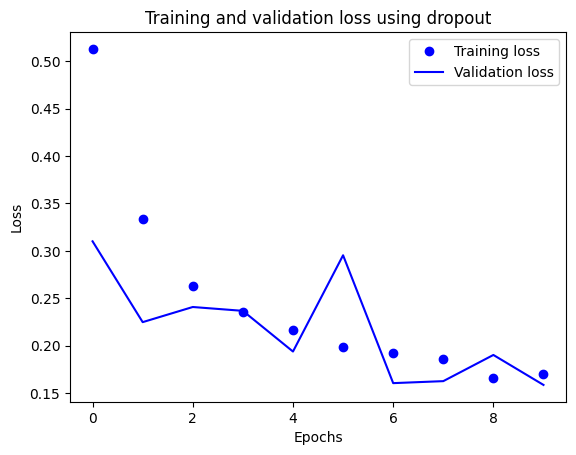

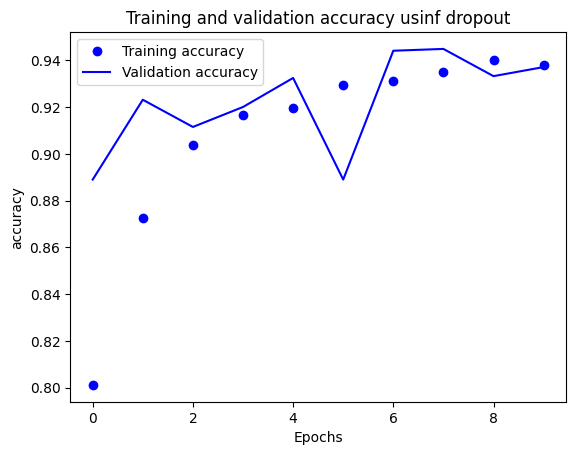

In [10]:
''' training loss and validation loss graph '''
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(train_loss, 'bo', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss using dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

''' training accuracy and validation accuracy '''
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(train_acc, 'bo', label='Training accuracy')
plt.plot(val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy usinf dropout')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [11]:
''' Model1 '''

''' container '''
model1 = Sequential()

''' Convolutional Layers '''
model1.add(Convolution2D(32, (3, 3), input_shape = (200, 200, 1), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Convolution2D(32, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Convolution2D(32, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Convolution2D(64, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Flatten())

''' Hidden Layer '''
model1.add(Dense(128, activation = 'relu'))

''' Classification Layer '''
model1.add(Dense(3, activation = 'softmax'))

In [12]:
''' compile the model '''
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
''' training '''
history1 = model1.fit(train_ds, epochs = 10, validation_data= test_ds)

Epoch 1/10
258/258 [==============================] - 228s 879ms/step - loss: 0.5337 - accuracy: 0.7844 - val_loss: 0.2814 - val_accuracy: 0.9084
Epoch 2/10
258/258 [==============================] - 241s 933ms/step - loss: 0.3171 - accuracy: 0.8818 - val_loss: 0.2070 - val_accuracy: 0.9325
Epoch 3/10
258/258 [==============================] - 222s 857ms/step - loss: 0.2841 - accuracy: 0.8946 - val_loss: 0.2075 - val_accuracy: 0.9301
Epoch 4/10
258/258 [==============================] - 223s 865ms/step - loss: 0.2469 - accuracy: 0.9051 - val_loss: 0.2254 - val_accuracy: 0.9286
Epoch 5/10
258/258 [==============================] - 239s 926ms/step - loss: 0.2178 - accuracy: 0.9197 - val_loss: 0.1904 - val_accuracy: 0.9371
Epoch 6/10
258/258 [==============================] - 226s 877ms/step - loss: 0.1903 - accuracy: 0.9335 - val_loss: 0.1782 - val_accuracy: 0.9425
Epoch 7/10
258/258 [==============================] - 223s 864ms/step - loss: 0.1919 - accuracy: 0.9252 - val_loss: 0.1384 -

In [19]:
hist_dict1 = history1.history
hist_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

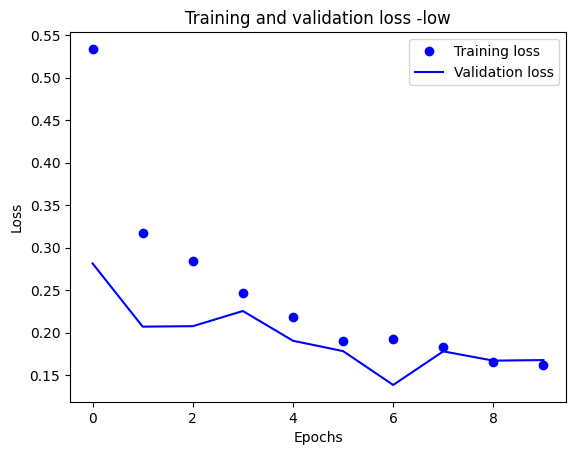

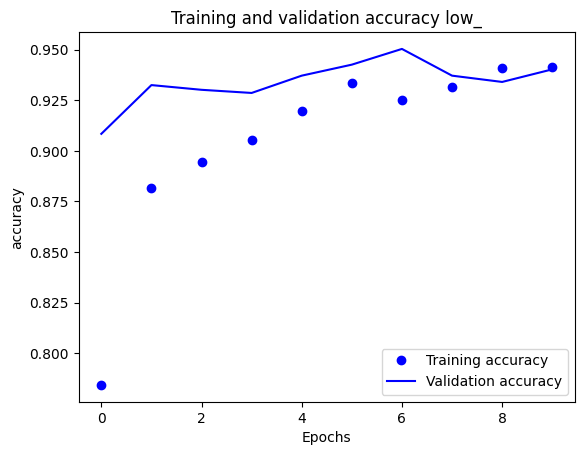

In [20]:
''' training loss and validation loss graph '''
train_loss = hist_dict1['loss']
val_loss = hist_dict1['val_loss']
plt.plot(train_loss, 'bo', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss -low')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

''' training accuracy and validation accuracy graph '''
train_acc = hist_dict1['accuracy']
val_acc = hist_dict1['val_accuracy']
plt.plot(train_acc, 'bo', label='Training accuracy')
plt.plot(val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy low_')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [21]:
''' Model2 '''

''' container '''
model2 = Sequential()

''' Convolutional Layers '''
model2.add(Convolution2D(32, (3, 3), input_shape = (200, 200, 1), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Convolution2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Convolution2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Convolution2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Flatten())

''' Hidden Layer '''
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.2))

''' Classification Layer '''
model2.add(Dense(3, activation = 'softmax'))

In [22]:
''' compile the model '''
model2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [24]:
''' training '''
history2 = model2.fit(train_ds, epochs = 10, validation_data= test_ds)

Epoch 1/10
258/258 [==============================] - 250s 964ms/step - loss: 0.6037 - accuracy: 0.7574 - val_loss: 0.5142 - val_accuracy: 0.8012
Epoch 2/10
258/258 [==============================] - 246s 952ms/step - loss: 0.3830 - accuracy: 0.8507 - val_loss: 0.2786 - val_accuracy: 0.9123
Epoch 3/10
258/258 [==============================] - 245s 947ms/step - loss: 0.3163 - accuracy: 0.8789 - val_loss: 0.3056 - val_accuracy: 0.8851
Epoch 4/10
258/258 [==============================] - 246s 951ms/step - loss: 0.2946 - accuracy: 0.8902 - val_loss: 0.2415 - val_accuracy: 0.9208
Epoch 5/10
258/258 [==============================] - 261s 1s/step - loss: 0.2655 - accuracy: 0.9024 - val_loss: 0.1889 - val_accuracy: 0.9402
Epoch 6/10
258/258 [==============================] - 247s 958ms/step - loss: 0.2416 - accuracy: 0.9104 - val_loss: 0.1958 - val_accuracy: 0.9293
Epoch 7/10
258/258 [==============================] - 262s 1s/step - loss: 0.2360 - accuracy: 0.9125 - val_loss: 0.2040 - val_a